# Deric EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# specify the date format to be parsed
date_format = '%Y-%m-%d'
# read csv files
billboard_cleaned = pd.read_csv('billboard_dataset/processed/billboard_cleaned.csv', parse_dates=['week_id'], date_format=date_format)
audio_features_merged = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv', parse_dates=['week_id'], date_format=date_format)

In [2]:
# Examine long billboard data
print(billboard_cleaned.shape)
print(billboard_cleaned.columns)
billboard_cleaned.head(2)

(327895, 9)
Index(['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance',
       'previous_week_position', 'peak_position', 'weeks_on_chart'],
      dtype='object')


,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart
0,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5


In [3]:
# Examine collapsed billboard data with audio features
print(audio_features_merged.shape)
print(audio_features_merged.columns)
audio_features_merged.head(2)

(29383, 23)
Index(['song_id', 'performer', 'song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'peak_position', 'week_id', 'weeks_on_chart'],
      dtype='object')


,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's mu...",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,...,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,...,0.12700,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14


## Artists with most hits

In [4]:
# Filter to Rank 1 songs
rank1_df = audio_features_merged[audio_features_merged.peak_position == 1]
print(rank1_df.shape)
rank1_artists = rank1_df[['performer', 'peak_position']].groupby('performer').sum('peak_position').sort_values('peak_position', ascending = False).reset_index()
rank1_artists_top = rank1_artists[rank1_artists.peak_position > 5]
rank1_artists_top

(1098, 23)


,performer,peak_position
0,The Beatles,19
1,Mariah Carey,16
2,Madonna,12
3,The Supremes,10
4,Michael Jackson,10
5,Bee Gees,9
6,The Rolling Stones,8
7,Stevie Wonder,7
8,Janet Jackson,7
9,Whitney Houston,7


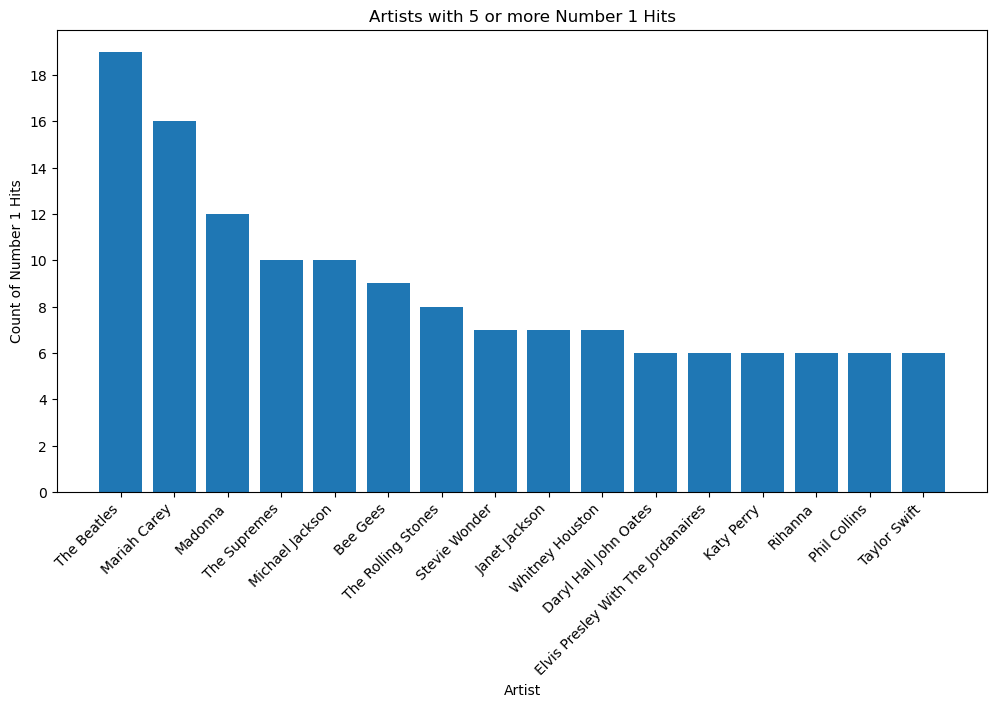

In [5]:
# Plot artists with 5 or more number 1 hits
plt.figure(figsize=(12, 6))
plt.bar(rank1_artists_top.performer, rank1_artists_top.peak_position)
plt.title('Artists with 5 or more Number 1 Hits')
plt.xlabel('Artist')
plt.ylabel('Count of Number 1 Hits')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, max(rank1_artists_top.peak_position)+1, 2))
plt.show()

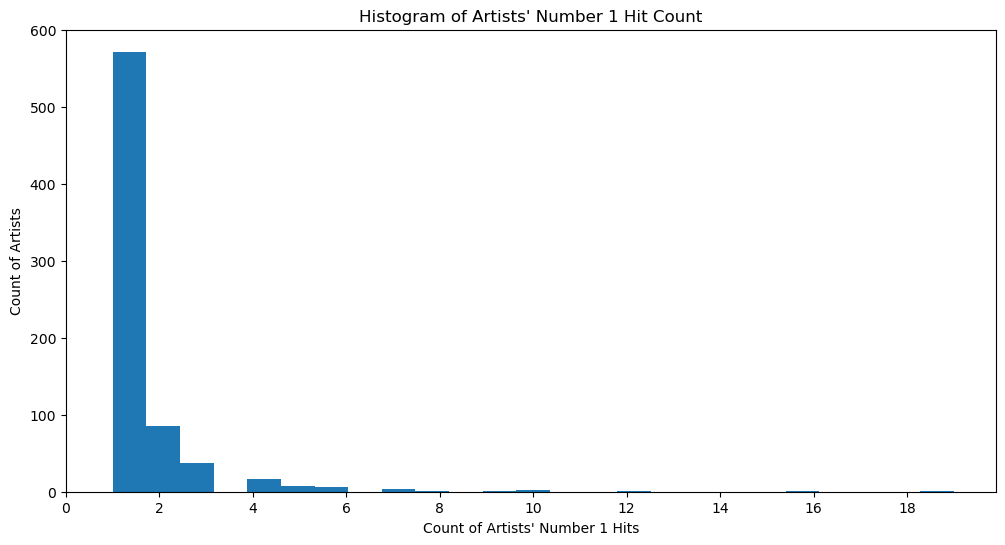

In [6]:
# Plot histogram of artist count of number 1 hits
plt.figure(figsize=(12,6))
plt.hist(rank1_artists.peak_position, bins = 25)
plt.title('Histogram of Artists\' Number 1 Hit Count')
plt.xlabel('Count of Artists\' Number 1 Hits')
plt.ylabel('Count of Artists')
plt.xticks(np.arange(0, max(rank1_artists_top.peak_position)+1, 2))
plt.show()

## Chart stickiness scatterplots

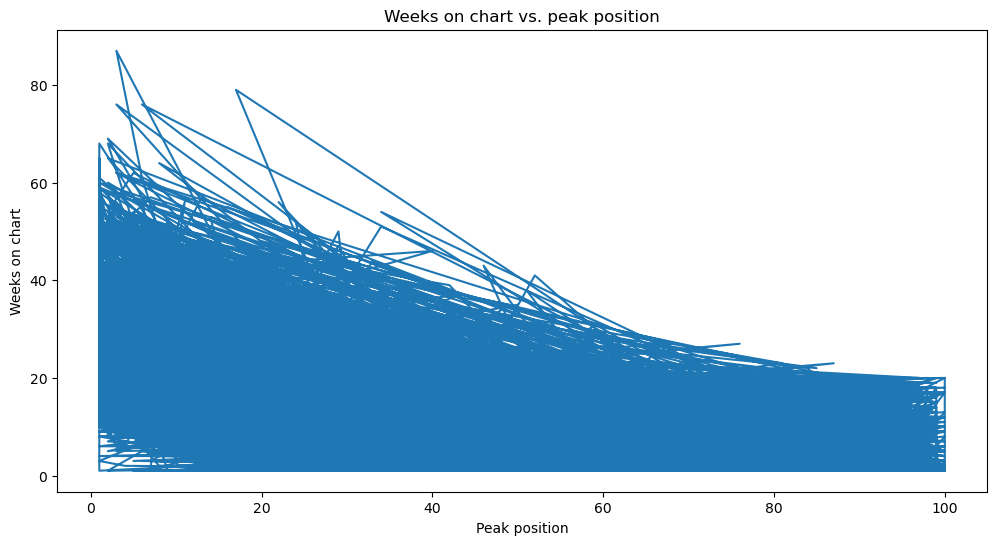

In [7]:
# Weeks on chart vs. peak position
plt.figure(figsize=(12,6))
plt.plot(audio_features_merged.peak_position, audio_features_merged.weeks_on_chart)
plt.title('Weeks on chart vs. peak position')
plt.xlabel('Peak position')
plt.ylabel('Weeks on chart')
plt.show()

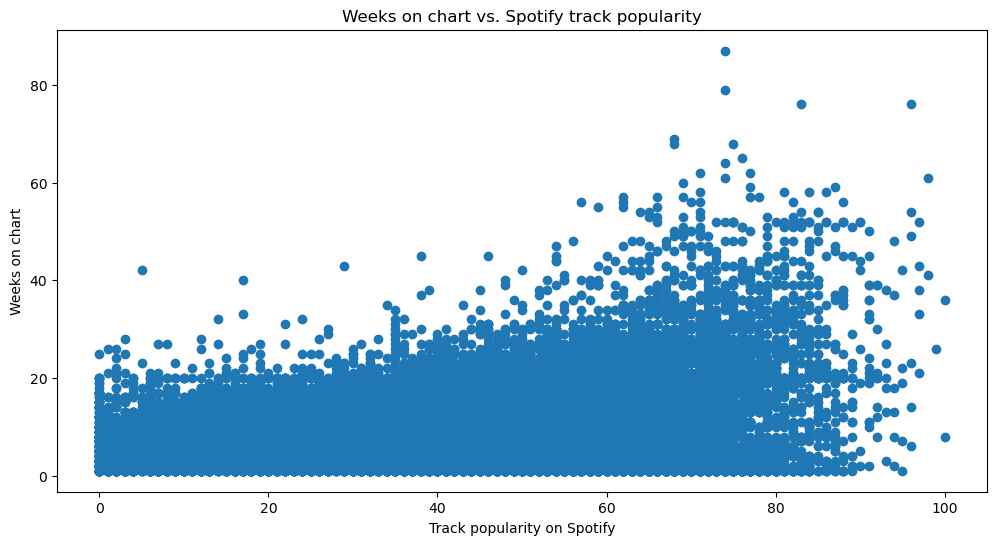

In [8]:
# Weeks on chart vs. peak position
plt.figure(figsize=(12,6))
plt.scatter(audio_features_merged.spotify_track_popularity, audio_features_merged.weeks_on_chart)
plt.title('Weeks on chart vs. Spotify track popularity')
plt.xlabel('Track popularity on Spotify')
plt.ylabel('Weeks on chart')
plt.show()

## Key Mode analysis

In [14]:
# Standardize key
audio_features_merged['key'].value_counts()
key_mapping = {0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F', 6: 'F#/Gb', 7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'}  
audio_features_merged['key_label'] = audio_features_merged['key'].map(key_mapping)

# Standardize mode
mode_mapping = {0: 'Minor', 1: 'Major'}
audio_features_merged['mode_label'] = audio_features_merged['mode'].map(mode_mapping)

# Create combined key variable
audio_features_merged['key_final'] = audio_features_merged['key_label'] + ' ' + audio_features_merged['mode_label']

In [15]:
audio_features_merged[['key', 'mode', 'key_final']].head()

,key,mode,key_final
0,9.0,0.0,A Minor
1,11.0,1.0,B Major
2,4.0,1.0,E Major
3,9.0,1.0,A Major
4,0.0,1.0,C Major


In [30]:
key_agg = audio_features_merged[['song_id', 'key_final']].groupby('key_final').count().reset_index().sort_values('song_id', ascending = False)
key_agg

,key_final,song_id
6,C Major,2569
20,G Major,2355
10,D Major,2152
0,A Major,1742
8,C#/Db Major,1567
16,F Major,1444
22,G#/Ab Major,1211
14,E Major,1176
2,A#/Bb Major,1102
5,B Minor,862


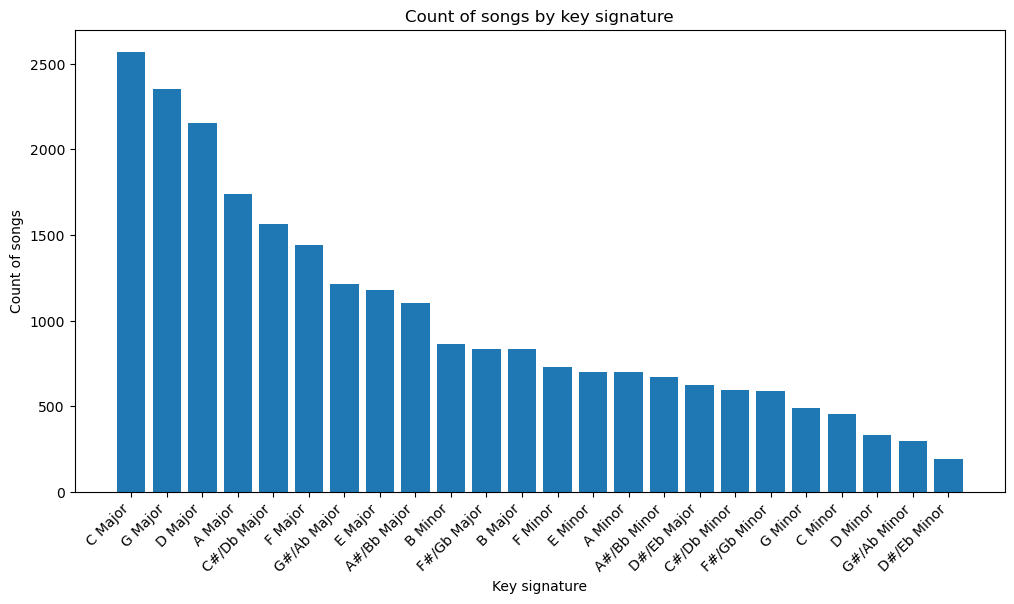

In [31]:
# Plot artists with 5 or more number 1 hits
plt.figure(figsize=(12, 6))
plt.bar(key_agg.key_final, key_agg.song_id)
plt.title('Count of songs by key signature')
plt.xlabel('Key signature')
plt.ylabel('Count of songs')
plt.xticks(rotation=45, ha='right')
plt.show()

## Week position delta

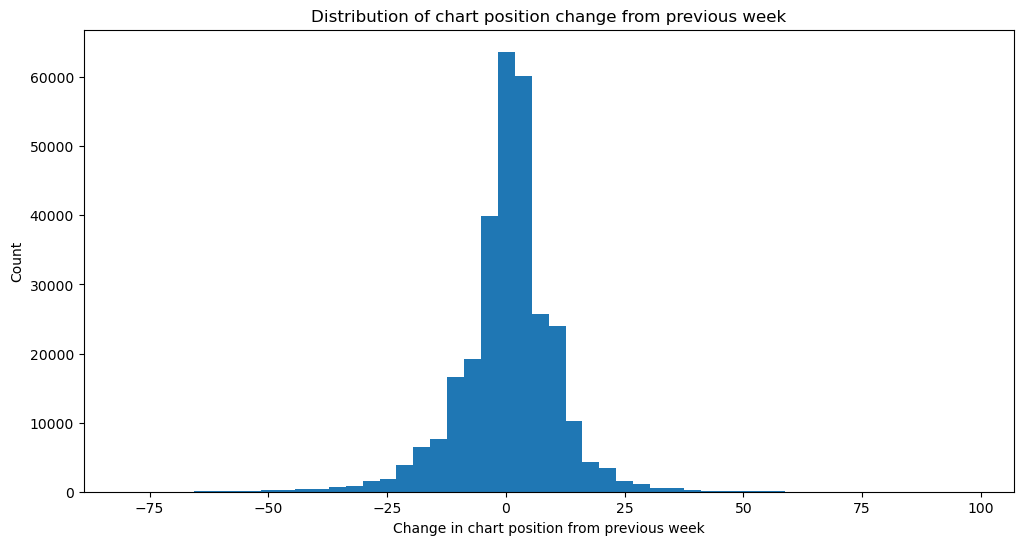

In [33]:
billboard_cleaned['delta'] = billboard_cleaned.previous_week_position - billboard_cleaned.week_position
plt.figure(figsize=(12, 6))
plt.hist(billboard_cleaned.delta, bins = 50)
plt.title('Distribution of chart position change from previous week')
plt.xlabel('Change in chart position from previous week')
plt.ylabel('Count')
plt.show()

## Average position from weeks on chart

In [40]:
# Average position by weeks on chart
billboard_position = billboard_cleaned[['weeks_on_chart', 'week_position']].groupby('weeks_on_chart').mean().reset_index()
billboard_position

,weeks_on_chart,week_position
0,1,80.456654
1,2,71.719771
2,3,63.201882
3,4,56.111228
4,5,50.426670
...,...,...
82,83,37.000000
83,84,39.000000
84,85,42.000000
85,86,48.000000


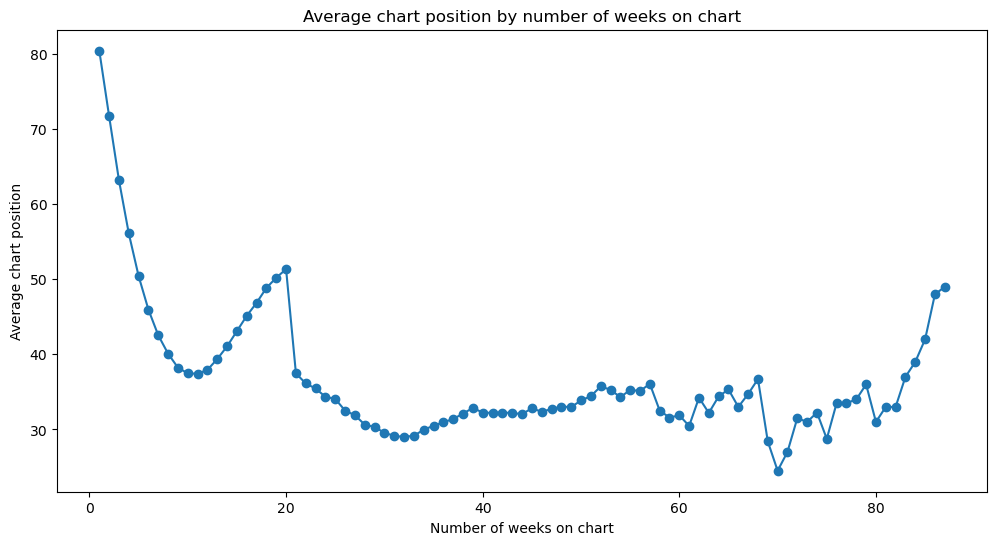

In [42]:
# Plot series of position by number of weeks on chart
plt.figure(figsize=(12, 6))
plt.scatter(billboard_position.weeks_on_chart, billboard_position.week_position)
plt.plot(billboard_position.weeks_on_chart, billboard_position.week_position)
plt.title('Average chart position by number of weeks on chart')
plt.xlabel('Number of weeks on chart')
plt.ylabel('Average chart position')
plt.show()